<a href="https://colab.research.google.com/github/chefdarek/data/blob/master/SF_OpenPolicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
sf = pd.read_csv('https://stacks.stanford.edu/file/druid:tr137st9964/tr137st9964_ca_san_francisco_2019_02_25.csv.zip')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
sf.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop
0,1,2007-01-01,00:11:00,POLK AT OFARRELL,37.784975,-122.419572,E,20.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,False,NaN,Moving Violation
1,2,2007-01-01,00:23:00,ELLIS AND TAYLOR,37.785091,-122.411166,J,32.0,other/unknown,male,vehicular,False,False,True,warning,NaN,False,False,NaN,MPC Violation
2,3,2007-01-01,00:28:00,101/ARMY,37.774949,-122.419291,D,27.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,NaN,Moving Violation
3,4,2007-01-01,00:30:00,CHARLES J BRENNAN ANDMARKET,37.774929,-122.419415,J,23.0,black,male,vehicular,False,True,False,citation,False,True,True,other,Moving Violation
4,5,2007-01-01,00:30:00,EMBARCADERO/BROADWAY,37.799318,-122.397569,E,24.0,hispanic,female,vehicular,False,True,False,citation,NaN,False,False,NaN,Moving Violation


In [0]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907761 entries, 0 to 907760
Data columns (total 20 columns):
raw_row_number      907761 non-null int64
date                907761 non-null object
time                907726 non-null object
location            907718 non-null object
lat                 906061 non-null float64
lng                 906061 non-null float64
district            855469 non-null object
subject_age         848723 non-null float64
subject_race        907761 non-null object
subject_sex         907761 non-null object
type                907761 non-null object
arrest_made         907761 non-null bool
citation_issued     907761 non-null bool
warning_issued      907761 non-null bool
outcome             891946 non-null object
contraband_found    53756 non-null object
search_conducted    907761 non-null bool
search_vehicle      907761 non-null bool
search_basis        53756 non-null object
reason_for_stop     905537 non-null object
dtypes: bool(5), float64(3), int64(1), 

In [0]:
sf.describe(include='all')

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop
count,907761.000000,907761,907726,907718,906061.000000,906061.000000,855469,848723.000000,907761,907761,907761,907761,907761,907761,891946,53756,907761,907761,53756,905537
unique,NaN,3468,1440,313001,NaN,NaN,13,NaN,5,2,1,2,2,2,3,2,2,2,2,7
top,NaN,2009-03-20,23:00:00,FILLMORE/OFARRELL,NaN,NaN,H,NaN,white,male,vehicular,False,True,False,citation,False,False,False,other,Moving Violation
freq,NaN,631,6014,1252,NaN,NaN,117864,NaN,373414,641119,907761,895794,633508,661290,633508,45732,854005,854005,49028,565071
mean,453881.000000,NaN,NaN,NaN,37.762853,-122.429258,NaN,37.817622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,262048.173191,NaN,NaN,NaN,0.036681,0.042171,NaN,13.631270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,36.038676,-123.767429,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,226941.000000,NaN,NaN,NaN,37.740649,-122.448294,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,453881.000000,NaN,NaN,NaN,37.770038,-122.421294,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,680821.000000,NaN,NaN,NaN,37.782614,-122.408425,NaN,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
pd.to_datetime(sf.date, infer_datetime_format=True)
pd.to_datetime(sf.time, infer_datetime_format=True)

In [0]:
sf = sf.drop('raw_row_number', axis=1)

In [0]:
sf.reason_for_stop.unique()

array(['Moving Violation', 'MPC Violation',
       'Mechanical or Non-Moving Violation (V.C.)', 'DUI Check',
       'BOLO/APB/Warrant', 'Assistance to Motorist', nan,
       'Traffic Collision'], dtype=object)

In [0]:
sf.subject_race.unique()


array(['asian/pacific islander', 'other/unknown', 'hispanic', 'black',
       'white'], dtype=object)

In [0]:
sf['outcome'].value_counts(normalize=True)

citation    0.710254
warning     0.276330
arrest      0.013417
Name: outcome, dtype: float64

In [0]:
sf.columns

Index(['date', 'time', 'location', 'lat', 'lng', 'district', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_vehicle', 'search_basis', 'reason_for_stop'],
      dtype='object')

In [0]:
sf.dtypes

date                 object
time                 object
location             object
lat                 float64
lng                 float64
district             object
subject_age         float64
subject_race         object
subject_sex          object
type                 object
arrest_made            bool
citation_issued        bool
warning_issued         bool
outcome              object
contraband_found     object
search_conducted       bool
search_vehicle         bool
search_basis         object
reason_for_stop      object
dtype: object

In [0]:
sf['subject_race'].value_counts()

white                     373414
asian/pacific islander    158172
black                     152632
hispanic                  116397
other/unknown             107146
Name: subject_race, dtype: int64

In [0]:
sf['subject_sex'].value_counts()

male      641119
female    266642
Name: subject_sex, dtype: int64

In [0]:
#sf['subject_age'].value_counts(normalize=True)

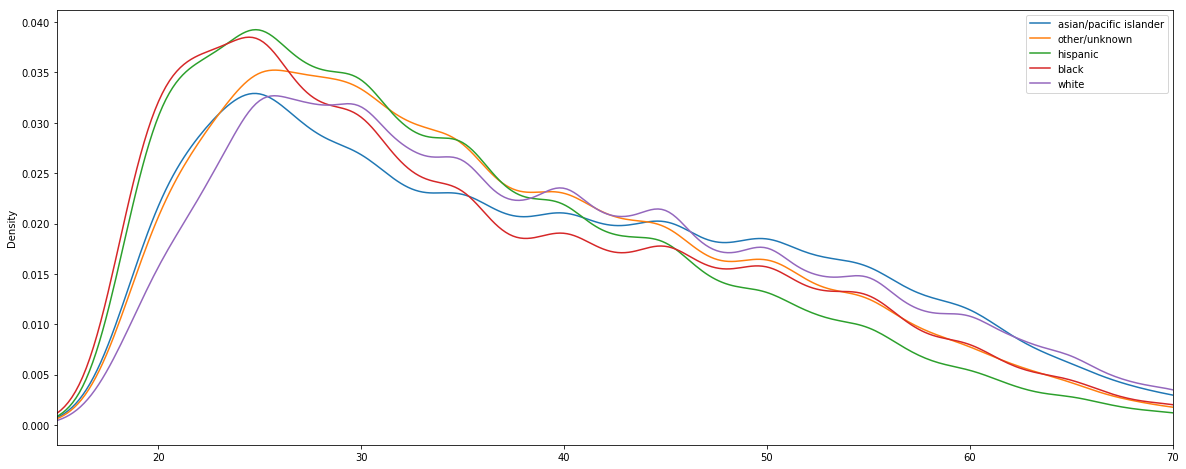

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xlim(15, 70)
for race in sf['subject_race'].unique():
    s = sf[sf['subject_race'] == race]['subject_age']
    s.plot.kde(ax=ax, label=race)
ax.legend();

# fig.savefig('images/race_age_dist.png', bbox_inches='tight')



In [0]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['outcome'] == 'warning'])
    n_citations = len(df[df['outcome'] == 'citation'])
    n_arrests = len(df[df['outcome'] == 'arrest'])
    citations_per_warning = n_citations / n_warnings
    arrest_rate = n_arrests / n_total
    
    return(pd.Series(data = { 
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'citations_per_warning': citations_per_warning,
        'arrest_rate': arrest_rate
    }))
compute_outcome_stats(sf)

n_total                  907761.000000
n_warnings               246471.000000
n_citations              633508.000000
n_arrests                 11967.000000
citations_per_warning         2.570315
arrest_rate                   0.013183
dtype: float64

In [0]:
sf.groupby('subject_sex').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
subject_sex,,,,,,
female,266642.0,72641.0,188238.0,2531.0,2.591346,0.009492
male,641119.0,173830.0,445270.0,9436.0,2.561526,0.014718


In [0]:
sf.groupby('subject_race').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
subject_race,,,,,,
asian/pacific islander,158172.0,32120.0,123852.0,1222.0,3.855915,0.007726
black,152632.0,60904.0,83874.0,3554.0,1.377151,0.023285
hispanic,116397.0,31528.0,77590.0,2295.0,2.460987,0.019717
other/unknown,107146.0,22881.0,81658.0,914.0,3.568813,0.008530
white,373414.0,99038.0,266534.0,3982.0,2.691230,0.010664


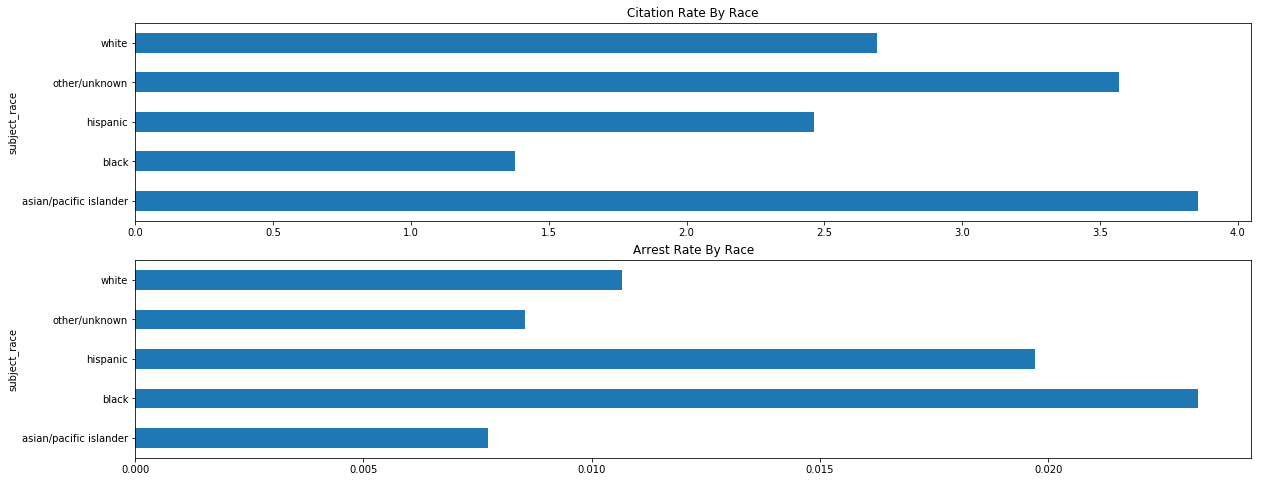

In [0]:
figsize=(20,8)
race_agg = sf.groupby(['subject_race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")
race_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By Race');

# fig.savefig('images/citations_and_arrests_by_race.png', bbox_inches='tight')



In [0]:
sf.columns

Index(['date', 'time', 'location', 'lat', 'lng', 'district', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_vehicle', 'search_basis', 'reason_for_stop'],
      dtype='object')

In [0]:
rva = sf.groupby(['subject_race','search_conducted']).apply(compute_outcome_stats)

rwa = pd.DataFrame(rva)

(rwa.loc[:]
    .style
    .background_gradient(cmap='inferno', low=0, high=.8)
    .highlight_null('red'))

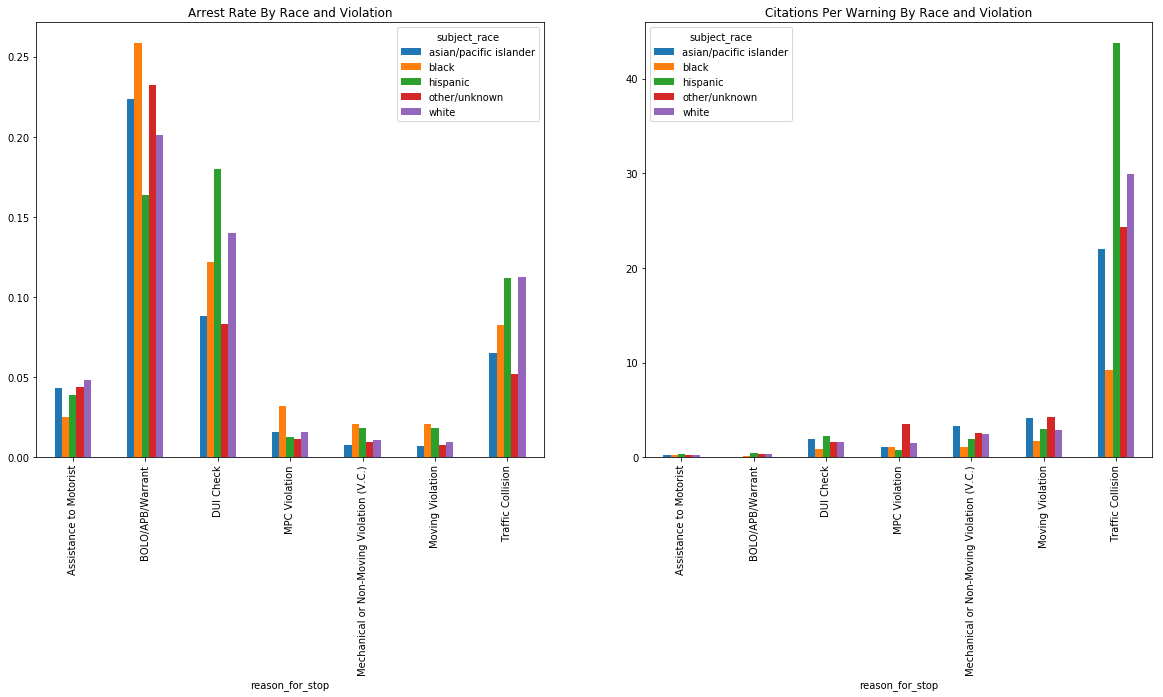

In [0]:
race_stats = sf.groupby(['reason_for_stop', 'subject_race']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
race_stats.plot.bar(y='arrest_rate', ax=axes[0], title='Arrest Rate By Race and Violation')
race_stats.plot.bar(y='citations_per_warning', ax=axes[1], title='Citations Per Warning By Race and Violation')
                                                       # 
#fig.savefig('images/citations_and_arrests_by_race_and_violation.png', bbox_inches='tight')

In [0]:
def compute_search_stats(df):
    """Compute the search rate and hit rate"""
    search_conducted = df['search_conducted']
    contraband_found = df['contraband_found']
    n_stops     = len(search_conducted)
    n_searches  = sum(search_conducted)
    n_hits      = df.contraband_found.sum()
    
  
    search_rate = n_searches / n_stops
    
    
    hit_rate = df.contraband_found.sum() / df.search_conducted.sum()
    
    return(pd.Series(data = { 
        'n_stops': n_stops,
        'n_searches': n_searches,
        'n_hits': n_hits,
        'search_rate': search_rate,
        'hit_rate': hit_rate
    }))

In [0]:
compute_search_stats(sf)

n_stops        907761.000000
n_searches      53756.000000
n_hits           8024.000000
search_rate         0.059218
hit_rate            0.149267
dtype: float64

In [0]:
sf.groupby('subject_sex').apply(compute_search_stats)

,n_stops,n_searches,n_hits,search_rate,hit_rate
subject_sex,,,,,
female,266642.0,9045.0,1854.0,0.033922,0.204975
male,641119.0,44711.0,6170.0,0.069739,0.137997


In [0]:
age_groups = pd.cut(sf["subject_age"], np.arange(15, 70, 5))
agemap = sf.groupby(age_groups).apply(compute_search_stats)
agemap = pd.DataFrame(agemap)

(agemap.loc[:]
    .style
    .background_gradient(cmap='inferno', low=0, high=.8)
    .highlight_null('red'))

,n_stops,n_searches,n_hits,search_rate,hit_rate
subject_age,,,,,
"(15, 20]",47738,5435,804,0.113851,0.14793
"(20, 25]",132864,12691,1493,0.0955187,0.117642
"(25, 30]",138553,10116,1214,0.0730118,0.120008
"(30, 35]",114223,6874,941,0.0601805,0.136893
"(35, 40]",94103,4836,702,0.0513905,0.145161
"(40, 45]",85425,3859,612,0.0451741,0.15859
"(45, 50]",72422,3032,575,0.0418657,0.189644
"(50, 55]",61028,1998,441,0.0327391,0.220721
"(55, 60]",44866,1135,299,0.0252976,0.263436


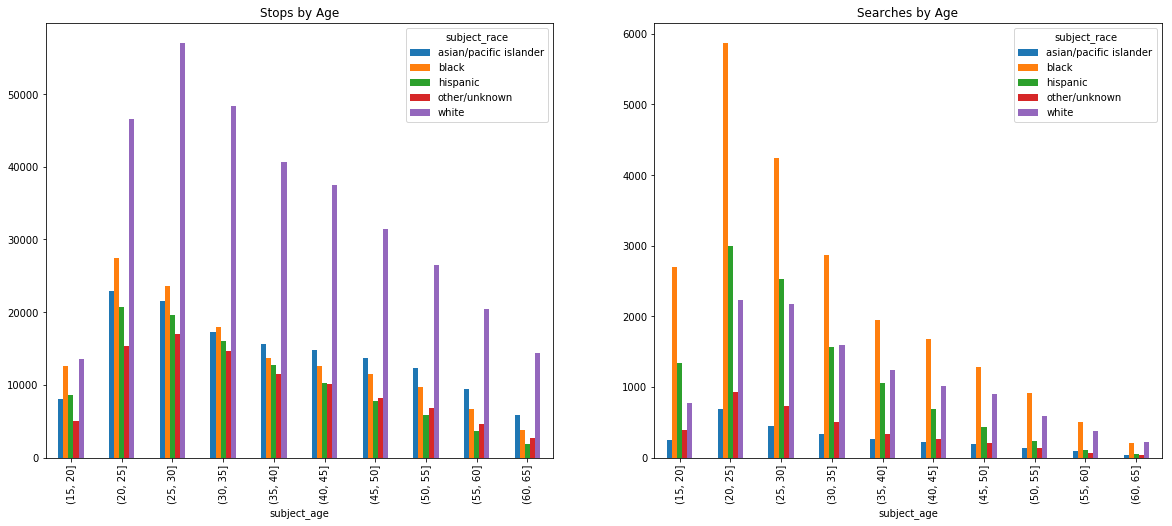

In [0]:
age_stats = sf.groupby([age_groups, 'subject_race']).apply(compute_search_stats).unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
age_stats.plot.bar(y='n_stops', ax=axes[0], title='Stops by Age')
age_stats.plot.bar(y='n_searches', ax=axes[1], title='Searches by Age');

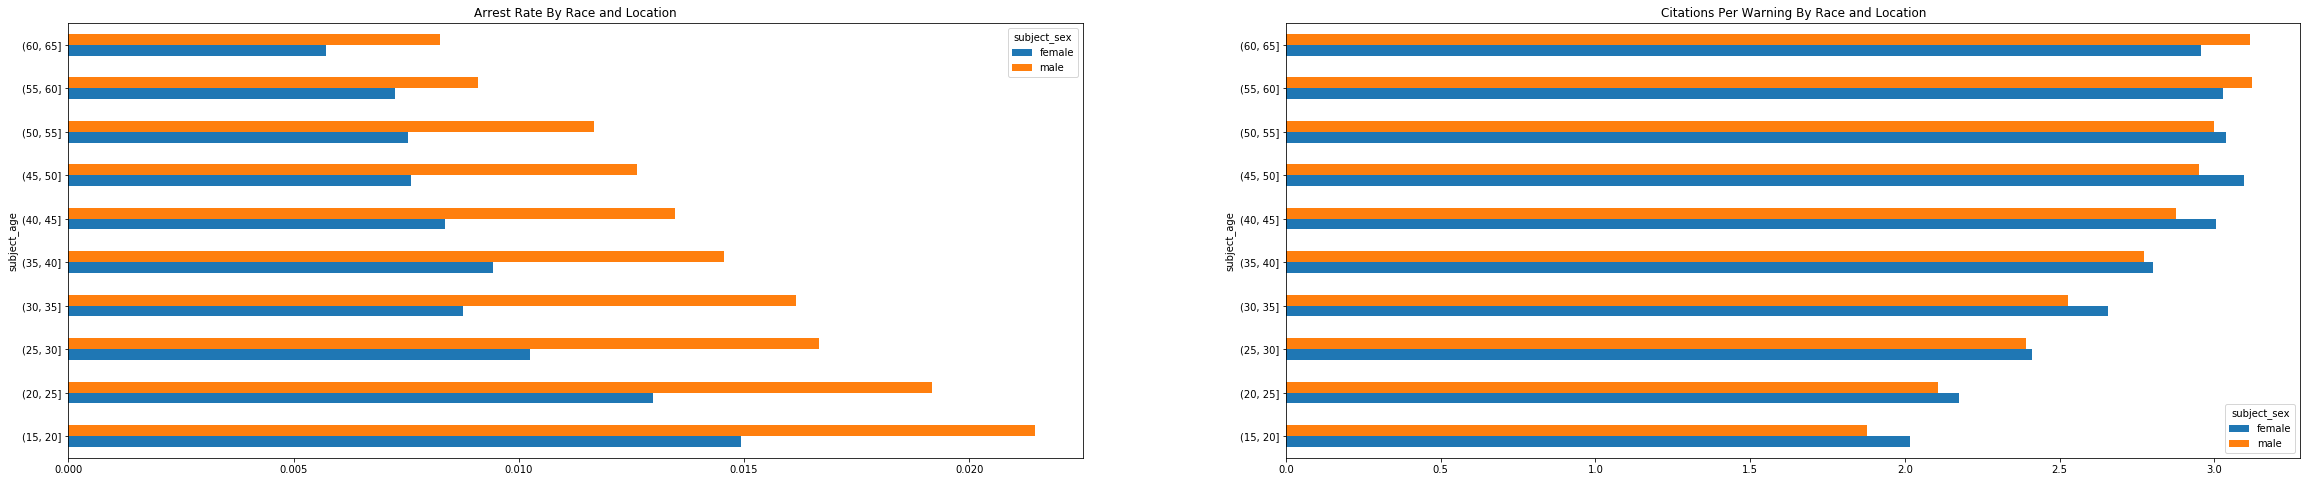

In [0]:
reason_stats = sf.groupby([age_groups,'subject_sex']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,8))
reason_stats.plot.barh(y='arrest_rate', ax=axes[0], title='Arrest Rate By Race and Location')
reason_stats.plot.barh(y='citations_per_warning', ax=axes[1], title='Citations Per Warning By Race and Location')
                                                       # 
#fig.savefig('images/citations_and_arrests_by_race_and_violation.png', bbox_inches='tight')

In [0]:
sf.columns.tolist()


['date',
 'time',
 'location',
 'lat',
 'lng',
 'district',
 'subject_age',
 'subject_race',
 'subject_sex',
 'type',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'contraband_found',
 'search_conducted',
 'search_vehicle',
 'search_basis',
 'reason_for_stop']

In [0]:
import seaborn as sns


In [0]:
plt.figure(figsize=(16,9))
plt.title("Map of Stops")
sns.regplot(x='lat',y='lng',data=sf);

In [0]:
sf.subject_race.value_counts().tolist

white                     373414
asian/pacific islander    158172
black                     152632
hispanic                  116397
other/unknown             107146
Name: subject_race, dtype: int64

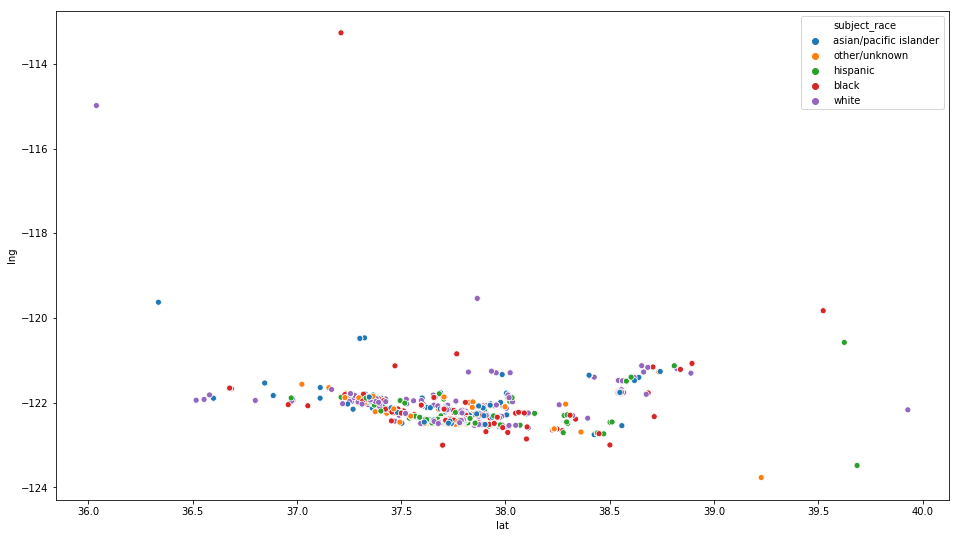

In [0]:
plt.figure(figsize=(16,9))
plt.title("Map of Stops")
sns.scatterplot(x='lat',y='lng',hue='subject_race', data=sf);

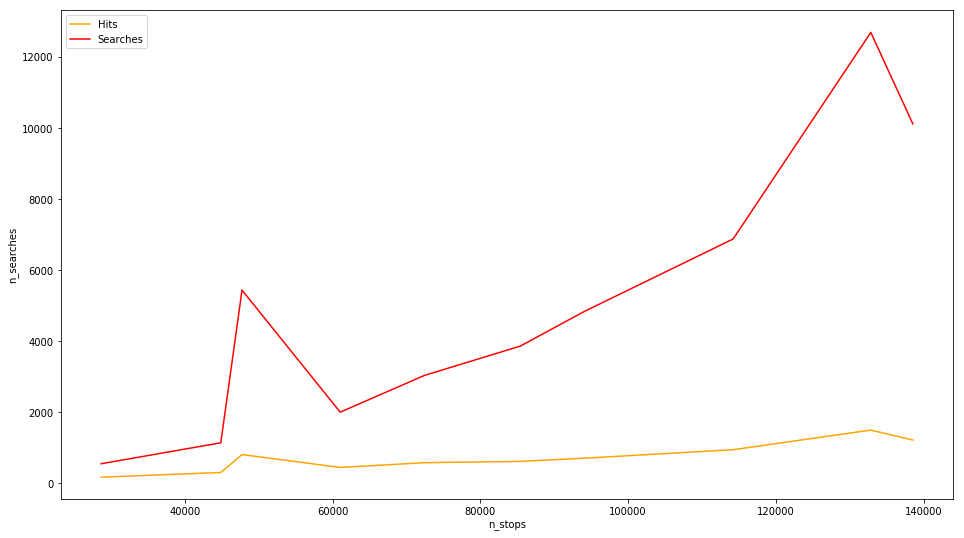

In [0]:
plt.figure(figsize=(16,9))
sns.lineplot(x='n_stops', y='n_hits', color='orange',label='Hits', data=agemap)
sns.lineplot(x='n_stops', y='n_searches', color='red',label='Searches', data=agemap);